In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Housing.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
def get_next_train_valid(X_shuffled, y_shuffled, itr, k):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = X_shuffled[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k,:]
    Y_valid = y_shuffled[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k]
    
    X_train = np.delete(X_shuffled, np.s_[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k:1], 0)
    Y_train = np.delete(y_shuffled, np.s_[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k:1], 0)
    
    
    return  X_train, Y_train, X_valid, Y_valid
    
    #return training and validation data

In [7]:
def train(X_train, y_train, lamda):
    """
    This function should implement fitting or training your model in question. 
    """
    
    X_train_mean = np.mean(X_train, axis=0)
    Y_train_mean = np.mean(Y_train, axis=0)
    X_train_reduced = X_train - np.tile(X_train_mean,(len(X_train),1))
    Y_train_reduced = Y_train - np.tile(Y_train_mean,(len(Y_train)))
    
    product_0 = X_train_reduced.T @ X_train_reduced  
    product_1 = lamda * np.eye(len(product_0))
    
    W = np.linalg.inv(product_0 + product_1)@ X_train_reduced.T @ Y_train_reduced
    
    residue = -X_train_mean@W + Y_train_mean
    
    
    
    return W , residue
    # return model

In [8]:
def predict(X_valid, W , offset):
    """
    Here, using the trained model, implement how to predict when you just have feature vector. 
    """
    
    return (X_valid@W + offset)
    # return 

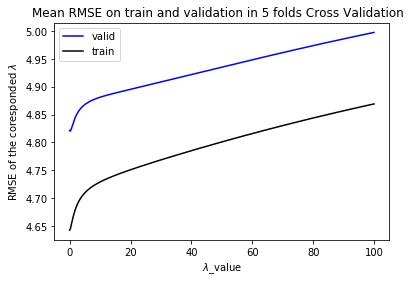

In [10]:
if __name__ == "__main__":
    #we are doing 5 folds cross_validation
    data = pd.read_csv("Housing.csv") 
    samples = np.array(data)
    
    #shuffle data samples
    np.random.shuffle(samples)
    
    #X
    X_shuffled = samples[:,:-1]
    y_shuffled = samples[:,-1]
    
    #save a copy of dataset just in case
    samples_full = samples
    
    #we are doing 5 folds cross_validation
    k = 5 
    
    #def MSE 
    MSE_y = np.zeros(k)
    
    MSE_y_train = np.zeros(k)
    
    lamda_set = np.linspace(0, 100, num=10**3+1)
    
    RMSE_mean =np.zeros(len(lamda_set))
    
    RMSE_mean_train =np.zeros(len(lamda_set))
    
    j = 0
    
    for lamda in lamda_set:
    
        for i in range(k):
            
            X_train, Y_train, X_valid, Y_valid = get_next_train_valid(X_shuffled, y_shuffled, i , k)
            
            model_weights, model_intercept = train(X_train, Y_train, lamda)
            
            y_predict_train = predict(X_train, model_weights, model_intercept)
            
            MSE_y_train[i] = np.mean((Y_train - y_predict_train)**2)
        
            y_predict = predict(X_valid, model_weights, model_intercept)
        
            MSE_y[i] = np.mean((Y_valid - y_predict)**2)
            
        
        RMSE_mean[j] = np.sqrt(np.mean(MSE_y))
        
        RMSE_mean_train[j] = np.sqrt(np.mean( MSE_y_train))
        
        j=j+1
        
    
    plt.xlabel(r'$\lambda$_value')
    plt.ylabel('RMSE of the coresponded '+ r'$\lambda$')
    plt.title('Mean RMSE on train and validation in 5 folds Cross Validation  ')
    plt.plot(lamda_set,  RMSE_mean, 'b',label = 'valid')   
    plt.plot(lamda_set,  RMSE_mean_train, 'k-', label = 'train')  
    plt.legend()
        